# 形態素解析
## 夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．

#### https://nlp100.github.io/ja/ch04.html

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/iamtatsuki05/NLP_100/blob/NLP_100_9/NLP_100_4.ipynb)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!wget https://nlp100.github.io/data/neko.txt

--2022-03-19 05:55:19--  https://nlp100.github.io/data/neko.txt
Resolving nlp100.github.io (nlp100.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to nlp100.github.io (nlp100.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 975789 (953K) [text/plain]
Saving to: ‘neko.txt.4’

neko.txt.4          100%[===================>] 952.92K  --.-KB/s    in 0.03s   

2022-03-19 05:55:20 (27.9 MB/s) - ‘neko.txt.4’ saved [975789/975789]



In [ ]:
!apt install mecab libmecab-dev mecab-ipadic-utf8

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libmecab-dev is already the newest version (0.996-5).
mecab is already the newest version (0.996-5).
mecab-ipadic-utf8 is already the newest version (2.7.0-20070801+main-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
!mecab -o ./neko.txt.mecab ./neko.txt

In [ ]:
!head -80 ./neko.txt.mecab

一	名詞,数,*,*,*,*,一,イチ,イチ
	記号,一般,*,*,*,*,*
EOS
	記号,一般,*,*,*,*,*
EOS
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。
	記号,一般,*,*,*,*,*
EOS
名前	名詞,一般,*,*,*,*,名前,ナマエ,ナマエ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
まだ	副詞,助詞類接続,*,*,*,*,まだ,マダ,マダ
無い	形容詞,自立,*,*,形容詞・アウオ段,基本形,無い,ナイ,ナイ
。	記号,句点,*,*,*,*,。,。,。
	記号,一般,*,*,*,*,*
EOS
	記号,一般,*,*,*,*,*
EOS
　	記号,空白,*,*,*,*,　,　,　
どこ	名詞,代名詞,一般,*,*,*,どこ,ドコ,ドコ
で	助詞,格助詞,一般,*,*,*,で,デ,デ
生れ	動詞,自立,*,*,一段,連用形,生れる,ウマレ,ウマレ
た	助動詞,*,*,*,特殊・タ,基本形,た,タ,タ
か	助詞,副助詞／並立助詞／終助詞,*,*,*,*,か,カ,カ
とんと	副詞,一般,*,*,*,*,とんと,トント,トント
見当	名詞,サ変接続,*,*,*,*,見当,ケントウ,ケントー
が	助詞,格助詞,一般,*,*,*,が,ガ,ガ
つか	動詞,自立,*,*,五段・カ行イ音便,未然形,つく,ツカ,ツカ
ぬ	助動詞,*,*,*,特殊・ヌ,基本形,ぬ,ヌ,ヌ
。	記号,句点,*,*,*,*,。,。,。
	記号,一般,*,*,*,*,*
EOS
何	名詞,代名詞,一般,*,*,*,何,ナニ,ナニ
でも	助詞,副助詞,*,*,*,*,でも,デモ,デモ
薄暗い	形容詞,自立,*,*,形容詞・アウオ段,基本形,薄暗い,ウスグライ,ウスグライ
じめじめ	副詞,一般,*,*,*,*,じめじめ,ジメジメ,ジメジメ
し	動詞,自立,*,*,サ変・スル,連用形,する,シ,シ
た	助動詞,*,*,*,特殊・タ,基本形,た,タ,タ
所	名詞,非自

In [1]:
#参考https://qiita.com/Ninagawa_Izumi/items/c90cccb453e2a6fc4466
#http://www.mwsoft.jp/programming/munou/mecab_command.html

#  形態素解析結果の読み込み
## 形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [ ]:
txt_file = './neko.txt.mecab'
samples = []
maps = []   #初期化

with open(txt_file , mode='r')as f:
  for line in f:
    if line != 'EOS\n': #EOS: End Of Statement #　EOSの部分を排除
      surface_list = line.split('\t')
      if len(surface_list) != 2 or surface_list[0] == '': #記号、空白などをスキップ
        continue
      else:
        tmp = surface_list[1].split(',')
        map = {'surface':surface_list[0] , 'base':tmp[6] , 'pos':tmp[0] , 'pos1':tmp[1]}
        maps.append(map)
    else:
      samples.append(maps)
      maps = [] #リセット

for num in samples[11]:
  print(num)

{'surface': 'ただ', 'base': 'ただ', 'pos': '接続詞', 'pos1': '*'}
{'surface': '彼', 'base': '彼', 'pos': '名詞', 'pos1': '代名詞'}
{'surface': 'の', 'base': 'の', 'pos': '助詞', 'pos1': '連体化'}
{'surface': '掌', 'base': '掌', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'に', 'base': 'に', 'pos': '助詞', 'pos1': '格助詞'}
{'surface': '載せ', 'base': '載せる', 'pos': '動詞', 'pos1': '自立'}
{'surface': 'られ', 'base': 'られる', 'pos': '動詞', 'pos1': '接尾'}
{'surface': 'て', 'base': 'て', 'pos': '助詞', 'pos1': '接続助詞'}
{'surface': 'スー', 'base': 'スー', 'pos': '名詞', 'pos1': '固有名詞'}
{'surface': 'と', 'base': 'と', 'pos': '助詞', 'pos1': '格助詞'}
{'surface': '持ち上げ', 'base': '持ち上げる', 'pos': '動詞', 'pos1': '自立'}
{'surface': 'られ', 'base': 'られる', 'pos': '動詞', 'pos1': '接尾'}
{'surface': 'た', 'base': 'た', 'pos': '助動詞', 'pos1': '*'}
{'surface': '時', 'base': '時', 'pos': '名詞', 'pos1': '非自立'}
{'surface': '何だか', 'base': '何だか', 'pos': '副詞', 'pos1': '一般'}
{'surface': 'フワフワ', 'base': 'フワフワ', 'pos': '副詞', 'pos1': '助詞類接続'}
{'surface': 'し', 'base': 'する', 'pos': '動詞', 'p

In [ ]:
#参考https://qiita.com/kei_0324/items/400f639b2f185b39a0cf#pospart-of-speech%E3%82%BF%E3%82%B0%E3%81%A8%E3%81%AF

# 動詞
## 動詞の表層形をすべて抽出せよ．

In [ ]:
#ex) {'surface': 'つか', 'base': 'つく', 'pos': '動詞', 'pos1': '自立'}
Vs = set()
for sample in samples:
  for num in sample:
    if num['pos'] == '動詞':
      Vs.add(num['surface'])

for v in list(Vs)[:30]:
  print(v)

取り扱い
相成
聞き出し
発し
言い触らす
踏み込ん
壊し
引か
比べ
疑
消え失せ
目ざす
失う
許し
抛り出さ
越える
漲っ
ひる
詰め込む
付ける
くっつい
怒鳴り
痛む
申さ
乗
及ぼし
問い返す
引きずり出し
捕え
撓る


#  動詞の基本形
## 動詞の基本形をすべて抽出せよ．


In [ ]:
#ex) {'surface': 'つか', 'base': 'つく', 'pos': '動詞', 'pos1': '自立'}
#動詞で識別し、入力データは基本形に！
V_bases = set()
for sample in samples:
  for num in sample:
    if num['pos'] == '動詞':
      V_bases.add(num['base'])

for V_base in list(V_bases)[:30]:
  print(V_base)

抛る
がかる
言い触らす
満ちる
差す
目ざす
失う
越える
つくる
ふくらます
ひる
付ける
詰め込む
沁みる
いざる
痛む
浸る
問い返す
こりる
痛める
撓る
におう
捻り出す
悟れる
やって来る
誓う
もぐ
着せる
尽す
取り極める


# AのB
## 2つの名詞が「の」で連結されている名詞句を抽出せよ

In [ ]:
#{'surface': '彼', 'base': '彼', 'pos': '名詞', 'pos1': '代名詞'}
# {'surface': 'の', 'base': 'の', 'pos': '助詞', 'pos1': '連体化'}
# {'surface': '掌', 'base': '掌', 'pos': '名詞', 'pos1': '一般'}
A_and_Bs = set()
for sample in samples:
  for num in range(1 , len(sample) - 1):
    if sample[num - 1]['pos'] == '名詞' and sample[num]['surface'] == 'の' and sample[num +1]['pos'] =='名詞':
      A_and_Bs.add(sample[num -1]['surface'] + sample[num]['surface'] + sample[num + 1]['surface'])

for A_and_B in list(A_and_Bs)[:30]:
  print(A_and_B)

彼の顔面
竜馬のよう
長吉の方
人間の眼
国の書生
自分の勢力
腰障子の破れ
んの泣き声
桟の三つ
こっちの記述
吾輩の写真
ための道具
地の道
気候の逆戻り
入の毛
館の倉
これらの凡眼
近所の女学校
家のもの
苦悶の結果
一流の特色
顔の横手
女の方
店の子
畳の目
釜中の章魚
環視の裡
天地の裡
人間の取扱
吾輩の傍


# 名詞の連接
## 名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [ ]:
#最長一致https://www.megasoft.co.jp/mifes/seiki/about.html
noun_continue = set()
for sample in samples:
  nouns = ''
  num = 0
  for tmp in sample:
    if tmp['pos'] == '名詞':
      nouns = ''.join([nouns , tmp['surface']])
      num += 1
    elif num >= 2: #初期化
      noun_continue.add(nouns)
      nouns = ''
      num = 0
    else:
      nouns = ''
      num = 0
  if num >=2:
    noun_continue.add(nouns)

for i in list(noun_continue)[:30]:
  print(i)

改良首きり器械
Archaiomelesidonophrunicherata
茶畠
孤城落日
金箔つき
当人同志
棒大
迷亭の
斑入
自分さい
放逐論
我理
摺小木
先生汗
注文通り二叉
仏作
一句毎
平均四五百円
運動場
古井何とか
存候草々不備
心元
燈国師
心理的
三四冊
先刻細君
三分の一
行ん
本もの
天地万有


# 単語の出現頻度
## 文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [ ]:
from collections import defaultdict
word_freq = defaultdict(int)
for sample in samples:
  for tmp in sample:
    if tmp['pos'] != '記号':
      word_freq[tmp['base']] += 1

word_freq_sorted = sorted(word_freq.items() , key = lambda x:x[1] , reverse=True)
word_freq_sorted

[('の', 9194),
 ('て', 6848),
 ('は', 6420),
 ('に', 6243),
 ('を', 6071),
 ('だ', 5972),
 ('と', 5508),
 ('が', 5337),
 ('た', 4267),
 ('する', 3657),
 ('ない', 3052),
 ('も', 2479),
 ('ある', 2320),
 ('*\n', 2191),
 ('で', 2084),
 ('から', 2031),
 ('いる', 1777),
 ('ん', 1568),
 ('か', 1529),
 ('云う', 1408),
 ('事', 1207),
 ('です', 1164),
 ('ます', 1146),
 ('なる', 1120),
 ('へ', 1034),
 ('う', 987),
 ('もの', 981),
 ('君', 973),
 ('主人', 932),
 ('ぬ', 719),
 ('よう', 696),
 ('見る', 675),
 ('ね', 657),
 ('この', 649),
 ('御', 636),
 ('ば', 617),
 ('人', 602),
 ('その', 576),
 ('一', 554),
 ('そう', 546),
 ('何', 539),
 ('思う', 502),
 ('よ', 502),
 ('吾輩', 481),
 ('来る', 460),
 ('れる', 450),
 ('じゃ', 450),
 ('これ', 414),
 ('さ', 410),
 ('それ', 381),
 ('聞く', 347),
 ('でも', 346),
 ('時', 345),
 ('行く', 340),
 ('出来る', 324),
 ('三', 319),
 ('出る', 317),
 ('な', 317),
 ('まで', 313),
 ('ところ', 313),
 ('方', 312),
 ('やる', 311),
 ('二', 303),
 ('上', 294),
 ('いい', 294),
 ('寒月', 286),
 ('顔', 282),
 ('先生', 274),
 ('人間', 272),
 ('くらい', 269),
 ('僕', 268),
 ('ごとし', 26

In [ ]:
#参考https://analysis-navi.com/?p=2167
#https://techacademy.jp/magazine/19309

# 頻度上位10語
## 出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [ ]:
!pip install japanize_matplotlib #日本語対応
import matplotlib.pyplot as plt
import japanize_matplotlib

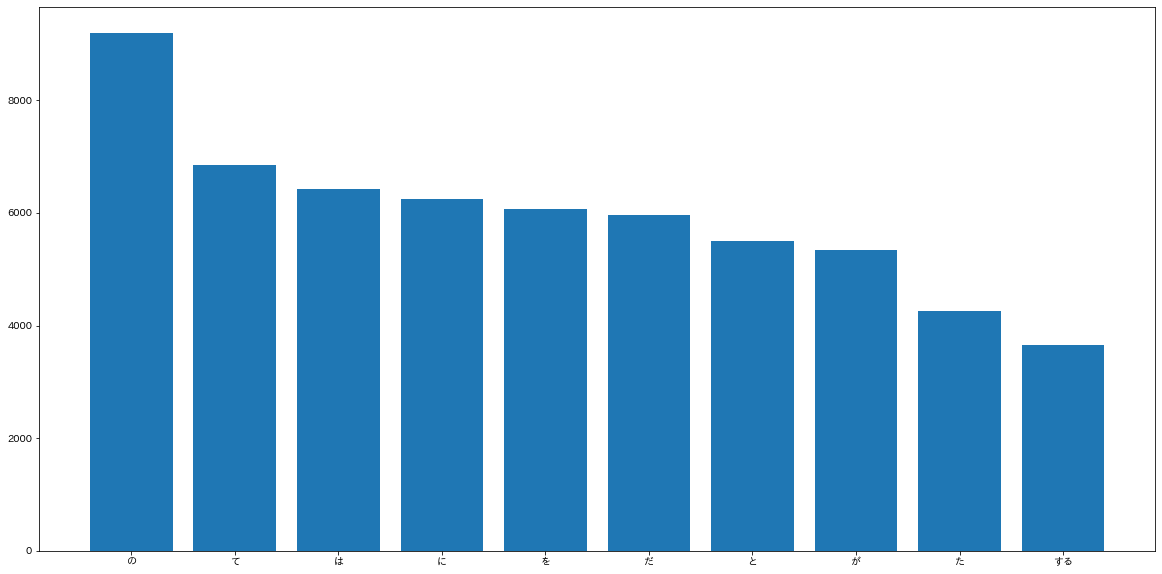

In [ ]:
x = [_[0] for _ in word_freq_sorted[:10]] #key
y = [_[1] for _ in word_freq_sorted[:10]] #volue
plt.figure(figsize=(20 ,10))
plt.bar(x , y)
plt.show()

# 「猫」と共起頻度の高い上位10語
## 「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ

In [ ]:
word_freq_cat = defaultdict(int)
for sample in samples:
  if '猫' in [_['surface'] for _ in sample]:
    for tmp in sample:
      if tmp['pos'] != '記号':
        word_freq_cat[tmp['base']] += 1
del word_freq_cat['猫']

#sort
word_freq_cat_soreted = sorted(word_freq_cat.items(), key=lambda x: x[1], reverse=True)

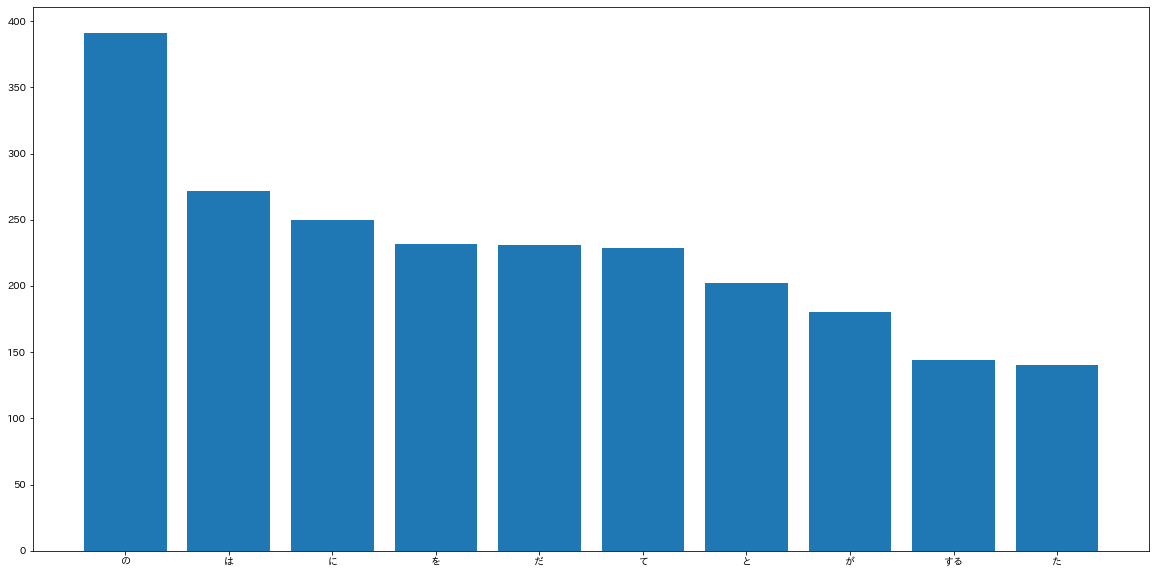

In [ ]:
x = [_[0] for _ in word_freq_cat_soreted[:10]] #key
y = [_[1] for _ in word_freq_cat_soreted[:10]] #volue
plt.figure(figsize=(20 ,10))
plt.bar(x , y)
plt.show()

# ヒストグラム
## 単語の出現頻度のヒストグラムを描け．ただし，横軸は出現頻度を表し，1から単語の出現頻度の最大値までの線形目盛とする．縦軸はx軸で示される出現頻度となった単語の異なり数（種類数）である．

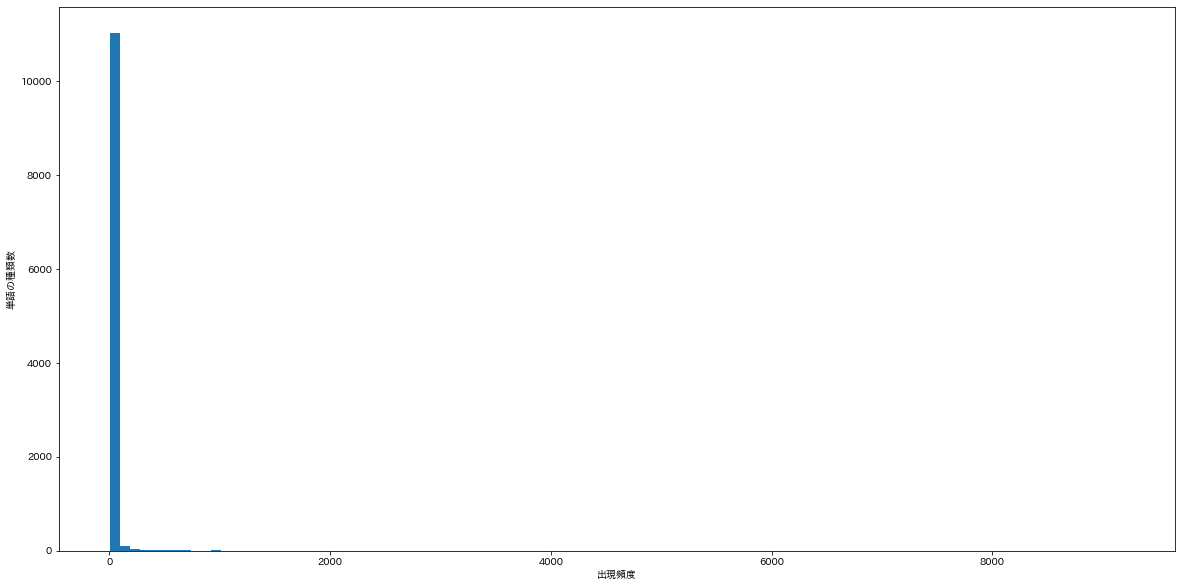

In [ ]:
values = word_freq.values()
plt.figure(figsize=(20 ,10))
plt.hist(values , bins = 100)
plt.xlabel('出現頻度')
plt.ylabel('単語の種類数')
plt.show()

# Zipfの法則
## 単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

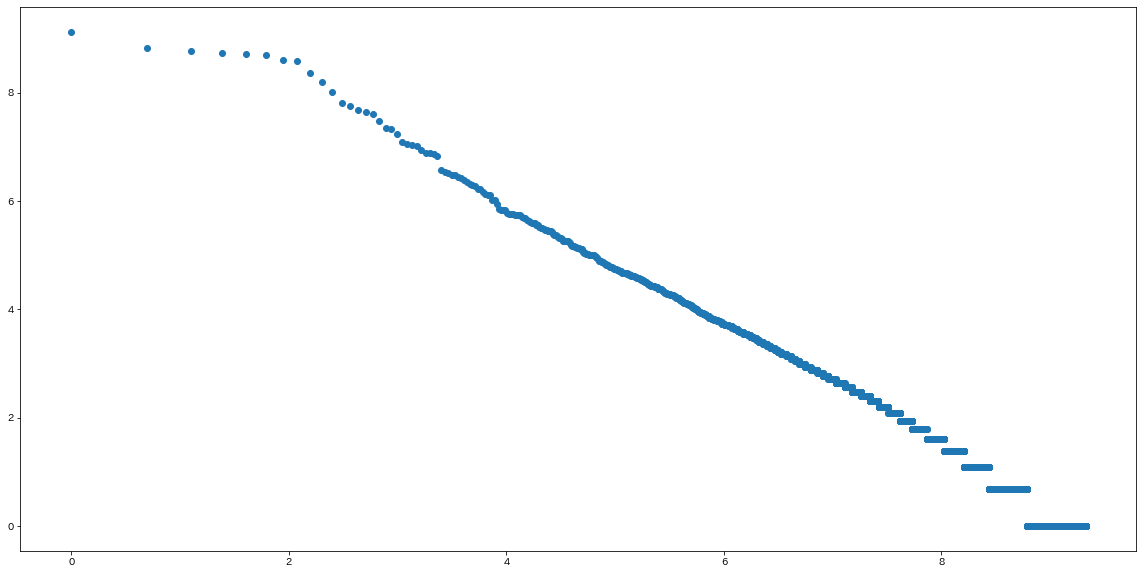

In [ ]:
import numpy as np

x = [_ + 1 for _ in range(len(word_freq_sorted))]
y = [_[1] for _ in word_freq_sorted]
plt.figure(figsize=(20 , 10))
plt.scatter(np.log(x) , np.log(y))
plt.show()

In [ ]:
#参考https://controlabo.com/logplot/